In [2]:
import rioxarray
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib import colors
import glob
from land_wavelet import wclass
import cv2
from matplotlib.animation import FuncAnimation

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
files = sorted(glob.glob('/home/ck/DIR/cornkle/data/nflics/MTG_VIS_tiffs/FCI_tif_NRT/*.tif'))

In [4]:
mtg_coords = xr.open_dataset('/home/ck/DIR/cornkle/data/EUMDAC_MTG_TESTS/mtg_coords.nc')

In [5]:
# dom_coords = mtg_coords.sel(x=da.x, y=da.y)

In [6]:
def read_geotiff(file):
    data = rioxarray.open_rasterio(file)
    data = data.where(data.values<60000, other=0)
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    da_box = data.isel(x=slice(3400,3700), y=slice(1000,1300)).squeeze()
    return da_box

In [7]:
da = read_geotiff(files[327])

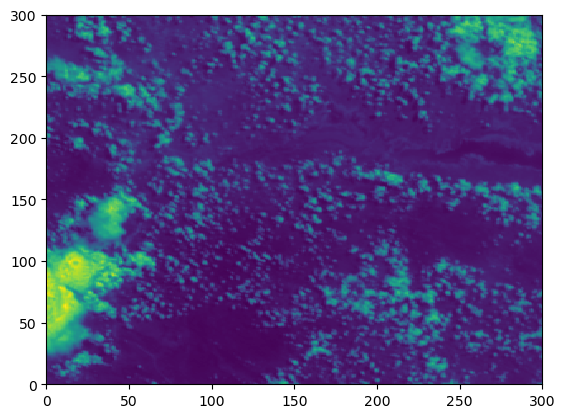

In [8]:
plt.pcolormesh(da.squeeze())

In [30]:
da_box = da.isel(x=slice(2000,2300), y=slice(1000,1300)).squeeze()   # x=slice(1000,2000), y=slice(3000,4000) for file120 reference image

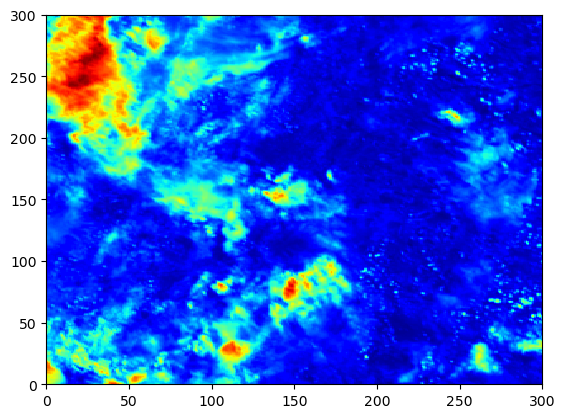

In [39]:
plt.pcolormesh(da_box, cmap='jet')

In [9]:
geotiff_files = files[79:119]

In [10]:
geotiff_files

['/home/ck/DIR/cornkle/data/nflics/MTG_VIS_tiffs/FCI_tif_NRT/FCIL1HRFI_20241222T074112Z_20241222T074416Z_epct_194ae64d_FC.tif',
 '/home/ck/DIR/cornkle/data/nflics/MTG_VIS_tiffs/FCI_tif_NRT/FCIL1HRFI_20241222T080112Z_20241222T080416Z_epct_519e5e5f_FC.tif',
 '/home/ck/DIR/cornkle/data/nflics/MTG_VIS_tiffs/FCI_tif_NRT/FCIL1HRFI_20241222T081112Z_20241222T081406Z_epct_2fd0db19_FC.tif',
 '/home/ck/DIR/cornkle/data/nflics/MTG_VIS_tiffs/FCI_tif_NRT/FCIL1HRFI_20241222T083112Z_20241222T083406Z_epct_aa0da6e1_FC.tif',
 '/home/ck/DIR/cornkle/data/nflics/MTG_VIS_tiffs/FCI_tif_NRT/FCIL1HRFI_20241222T084112Z_20241222T084406Z_epct_22d33992_FC.tif',
 '/home/ck/DIR/cornkle/data/nflics/MTG_VIS_tiffs/FCI_tif_NRT/FCIL1HRFI_20241222T090112Z_20241222T090406Z_epct_bc9e9c72_FC.tif',
 '/home/ck/DIR/cornkle/data/nflics/MTG_VIS_tiffs/FCI_tif_NRT/FCIL1HRFI_20241222T091112Z_20241222T091406Z_epct_a442044a_FC.tif',
 '/home/ck/DIR/cornkle/data/nflics/MTG_VIS_tiffs/FCI_tif_NRT/FCIL1HRFI_20241222T093112Z_20241222T093406Z

In [11]:
len(geotiff_files)

40

In [1]:
# Prepare figure for animation
fig, ax = plt.subplots()
image = ax.imshow(np.zeros((1, 1)), cmap='viridis')  # Placeholder image
#plt.colorbar(image)
#ax.axis('off')  # Turn off axis for better visualization

def update(frame):
    """Update function for each frame"""
    data = read_geotiff(geotiff_files[frame])
    image.set_data(data)
    image.set_clim(0, 1)  # Keep color scale consistent
    return [image]

# Create animation
anim = FuncAnimation(fig, update, frames=len(geotiff_files), interval=200, blit=False)

# Save animation (optional)
anim.save('geotiff_animation_int200.gif', writer='pillow')

# Display the animation
plt.show()

NameError: name 'plt' is not defined

In [88]:
data = read_geotiff(geotiff_files[14])

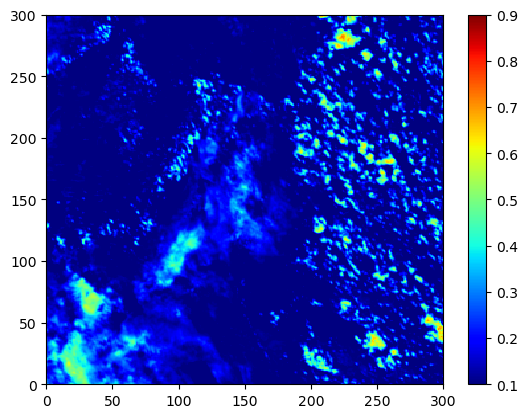

In [89]:
plt.pcolormesh(data, cmap='jet', vmin=0.1, vmax=0.9)
plt.colorbar()

In [100]:
import os
import rasterio
import matplotlib.pyplot as plt

output_folder = "/home/ck/DIR/cornkle/data/nflics/MTG_VIS_tiffs/pics"

os.makedirs(output_folder, exist_ok=True)

# Convert each GeoTIFF to PNG
for idx, file in enumerate(geotiff_files):
    f = plt.figure(figsize=(10,10), dpi=500)
    ax = f.add_subplot(111)
    data = read_geotiff(file)
    plt.pcolormesh(data, cmap='viridis')  # Adjust colormap as needed
    #plt.axis('off')  # No axes for cleaner visualization
    #plt.colorbar()
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f"frame_{idx:03d}.png"), bbox_inches='tight', pad_inches=0)
    plt.close()